## SNP calling

In [1]:
import pandas as pd
import os

processes = ["longcallR_nn","longcallR_nn_longcallR","only_longcallR"]
coverages = ["10-20x","20-40x","40-100x","100-infx","20-infx"]
regions = ["all","exons","non_exons"]
def get_happy(happy_dir,process,coverage,region):
    assert process in processes and coverage in coverages and region in regions
    if region=="all":
        fname = f"{happy_dir}/{process}.all_chr.filter.{coverage}.high_conf.summary.csv"
    else:
        fname = f"{happy_dir}/{process}.all_chr.filter.{coverage}.high_conf.{region}.summary.csv"
    df = pd.read_csv(fname,header=0,delimiter=",")
    df = df[(df["Type"]=="SNP")&(df["Filter"]=="PASS")][["TRUTH.TOTAL","TRUTH.TP","TRUTH.FN","QUERY.FP","METRIC.Recall","METRIC.Precision","METRIC.F1_Score"]]
    sample = os.path.basename(happy_dir)
    return df,sample

In [2]:
happy_all_directories = "Hap.py/longcallR_happy"
import os
from collections import defaultdict
tps = defaultdict(dict)
recalls = defaultdict(dict)
precisions = defaultdict(dict)
f1_scores = defaultdict(dict)
for directory in os.listdir(happy_all_directories):
    for coverage in ["20-infx"]:
        df,sample = get_happy(happy_all_directories+'/'+directory, "longcallR_nn_longcallR", coverage, "all")
        tps[sample][coverage] = df["TRUTH.TP"].values[0]
        recalls[sample][coverage] = df["METRIC.Recall"].values[0]
        precisions[sample][coverage] = df["METRIC.Precision"].values[0]
        f1_scores[sample][coverage] = df["METRIC.F1_Score"].values[0]
longcallR_df_tps = pd.DataFrame(tps)
longcallR_df_recalls = pd.DataFrame(recalls)
longcallR_df_precisions = pd.DataFrame(precisions)
longcallR_df_f1_scores = pd.DataFrame(f1_scores)

In [3]:
import pandas as pd
import os
coverages = ["10-20x","20-40x","40-100x","100-infx","20-infx"]
regions = ["all","exons","non_exons"]
def get_clair3_happy(happy_dir,coverage,region):
    assert coverage in coverages and region in regions
    if region=="all":
        fname = f"{happy_dir}/all_chr.filter.{coverage}.high_conf.summary.csv"
    else:
        fname = f"{happy_dir}/all_chr.filter.{coverage}.high_conf.{region}.summary.csv"
    df = pd.read_csv(fname,header=0,delimiter=",")
    df = df[(df["Type"]=="SNP")&(df["Filter"]=="PASS")][["TRUTH.TOTAL","TRUTH.TP","TRUTH.FN","QUERY.FP","METRIC.Recall","METRIC.Precision","METRIC.F1_Score"]]
    sample = os.path.basename(happy_dir)
    return df,sample

In [4]:
happy_all_directories = "Hap.py/clair3_rna_happy"
import os
from collections import defaultdict
tps = defaultdict(dict)
recalls = defaultdict(dict)
precisions = defaultdict(dict)
f1_scores = defaultdict(dict)
for directory in os.listdir(happy_all_directories):
    for coverage in ["20-infx"]:
        df,sample = get_clair3_happy(happy_all_directories+'/'+directory, coverage, "all")
        tps[sample][coverage] = df["TRUTH.TP"].values[0]
        recalls[sample][coverage] = df["METRIC.Recall"].values[0]
        precisions[sample][coverage] = df["METRIC.Precision"].values[0]
        f1_scores[sample][coverage] = df["METRIC.F1_Score"].values[0]
clair3_df_tps = pd.DataFrame(tps)
clair3_df_recalls = pd.DataFrame(recalls)
clair3_df_precisions = pd.DataFrame(precisions)
clair3_df_f1_scores = pd.DataFrame(f1_scores)

#### Fig.2a

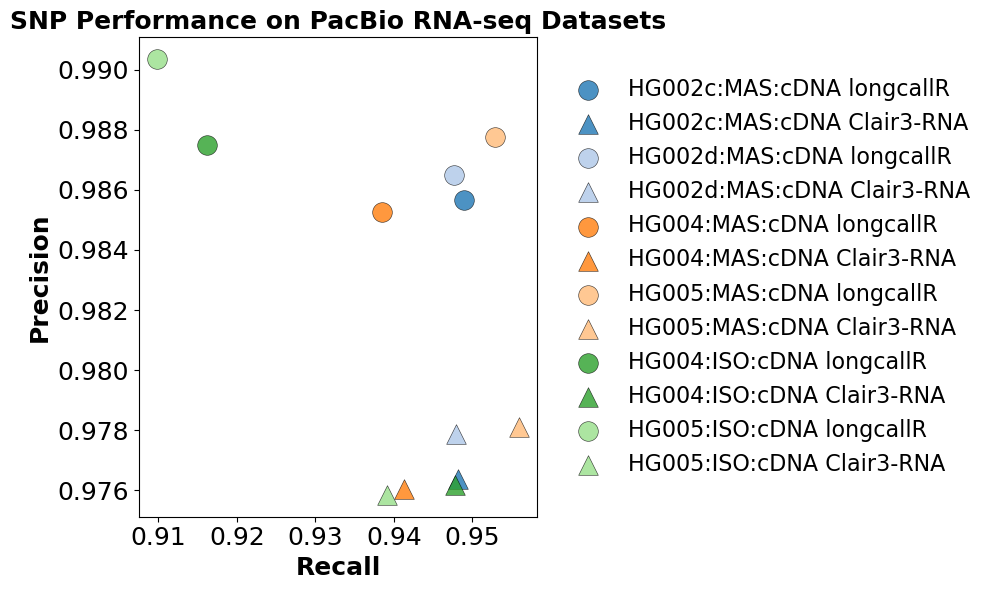

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import tab20

datasets = ["gm26105_masseq","gm27730_masseq","gm24143_masseq","gm24631_masseq", "hg004_isoseq","hg005_isoseq"]
datasets_names = ["HG002c:MAS:cDNA","HG002d:MAS:cDNA","HG004:MAS:cDNA","HG005:MAS:cDNA", "HG004:ISO:cDNA","HG005:ISO:cDNA"]

longcallR_recalls = longcallR_df_recalls[datasets].loc["20-infx"].to_numpy().tolist()

longcallR_precisions = longcallR_df_precisions[datasets].loc["20-infx"].to_numpy().tolist()

clair3_recalls = clair3_df_recalls[datasets].loc["20-infx"].to_numpy().tolist()

clair3_precisions = clair3_df_precisions[datasets].loc["20-infx"].to_numpy().tolist()


colors = tab20.colors  # Use the tab20 colormap for distinct colors

plt.figure(figsize=(10, 6))

for i, dataset in enumerate(datasets):
    # Plot longcallR results
    dataset_name = datasets_names[i]
    plt.scatter(
        longcallR_recalls[i], longcallR_precisions[i], color=colors[i % len(colors)], marker='o',
        label=f'{dataset_name} longcallR', s=200, edgecolors='black', linewidth=0.4, alpha=0.8
    )
    # Plot clair3 results
    plt.scatter(
        clair3_recalls[i], clair3_precisions[i], color=colors[i % len(colors)], marker='^',
        label=f'{dataset_name} Clair3-RNA', s=200, edgecolors='black', linewidth=0.4, alpha=0.8
    )

plt.xlabel('Recall', fontsize=18, fontweight='bold')
plt.ylabel('Precision', fontsize=18, fontweight='bold')
plt.title('SNP Performance on PacBio RNA-seq Datasets', fontsize=18, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(
    by_label.values(), by_label.keys(), fontsize=16, ncol=1, loc='center left',
    bbox_to_anchor=(1.05, 0.5), borderaxespad=0, frameon=False
)

output_file = "Fig2a.svg"
plt.savefig(output_file, format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()


#### Fig.2b

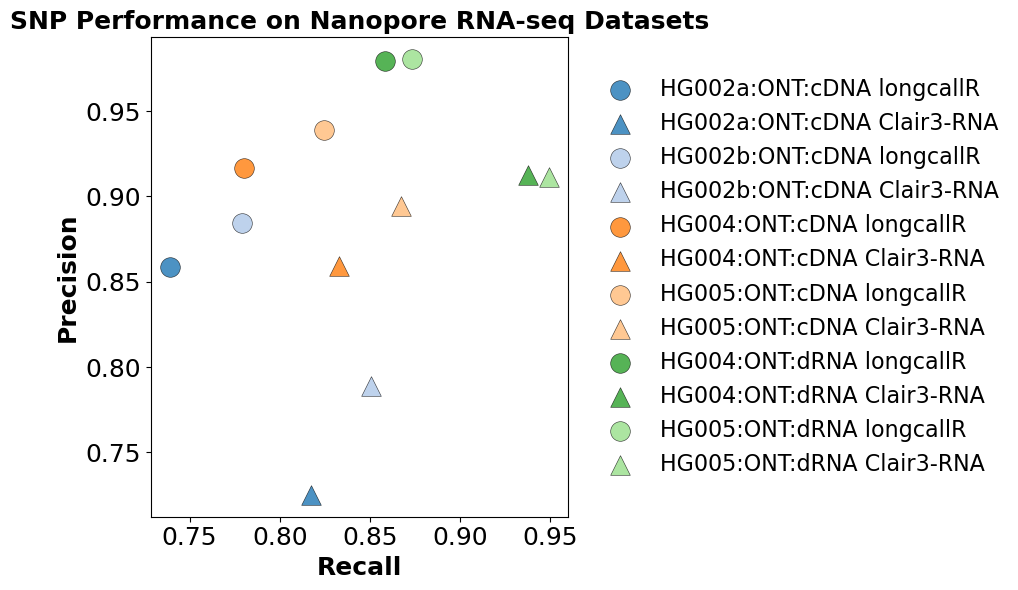

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import tab20

datasets = ["gm26105_pcs111", "gm27730_pcs111", "hg004_pcs111", "hg005_pcs111", "hg004_drna004", "hg005_drna004"]
datasets_names = ["HG002a:ONT:cDNA","HG002b:ONT:cDNA", "HG004:ONT:cDNA", "HG005:ONT:cDNA","HG004:ONT:dRNA", "HG005:ONT:dRNA"]


longcallR_recalls = longcallR_df_recalls[datasets].loc["20-infx"].to_numpy().tolist()

longcallR_precisions = longcallR_df_precisions[datasets].loc["20-infx"].to_numpy().tolist()

clair3_recalls = clair3_df_recalls[datasets].loc["20-infx"].to_numpy().tolist()

clair3_precisions = clair3_df_precisions[datasets].loc["20-infx"].to_numpy().tolist()


colors = tab20.colors  # Use the tab20 colormap for distinct colors

plt.figure(figsize=(10, 6))

for i, dataset in enumerate(datasets):
    dataset_name = datasets_names[i]
    # Plot longcallR results
    plt.scatter(
        longcallR_recalls[i], longcallR_precisions[i], color=colors[i % len(colors)], marker='o',
        label=f'{dataset_name} longcallR', s=200, edgecolors='black', linewidth=0.4, alpha=0.8
    )
    # Plot clair3 results
    plt.scatter(
        clair3_recalls[i], clair3_precisions[i], color=colors[i % len(colors)], marker='^',
        label=f'{dataset_name} Clair3-RNA', s=200, edgecolors='black', linewidth=0.4, alpha=0.8
    )

plt.xlabel('Recall', fontsize=18, fontweight='bold')
plt.ylabel('Precision', fontsize=18, fontweight='bold')
plt.title('SNP Performance on Nanopore RNA-seq Datasets', fontsize=18, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(
    by_label.values(), by_label.keys(), fontsize=16, ncol=1, loc='center left',
    bbox_to_anchor=(1.05, 0.5), borderaxespad=0, frameon=False
)

output_file = "Fig2b.svg"
plt.savefig(output_file, format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()


## Phasing

In [7]:
chrom_names = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 
          'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 
          'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22']
def get_whatshap_phase_block_dict(gtf_file):
    phased_block_chr_whatshap_dict = {}
    for i in chrom_names:
        phased_block_df = pd.read_csv(gtf_file, header=None, sep="\t",
            names=["chr","phasing","ex/intron","start","end","1","strand","2","info",],)
        phased_block_df_current_chrom = phased_block_df[phased_block_df.chr == i]
        phased_block_chr_whatshap_dict.update({i: list(zip(phased_block_df_current_chrom["start"], phased_block_df_current_chrom["end"]))})
    return phased_block_chr_whatshap_dict

def get_genome_n50(final_block_dict):
    genome_block_len_list = []
    for i in final_block_dict.values():
        for j in i:
            genome_block_len_list.append(j[1]-j[0])
    sum_block_len = 0
    for i in sorted(genome_block_len_list):
        sum_block_len += i
        if sum_block_len > sum(genome_block_len_list)/2:
            return i

def get_whatshap_n50(gtf_file):
    phased_block_chr_whatshap_dict = get_whatshap_phase_block_dict(gtf_file)
    return get_genome_n50(phased_block_chr_whatshap_dict)

#### Supp Table 5

In [8]:
import pandas as pd
gtf_file = "Phasing_results/longcallR_nn_longcallR/gm26105_masseq.gtf"
tsv_file = "Phasing_results/longcallR_nn_longcallR/gm26105_masseq.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 31240
all_switches: 110
all_switch_rate: 0.001058367
blockwise_hamming: 220
blockwise_hamming_rate: 0.001779681


In [9]:
import pandas as pd
gtf_file = "Phasing_results/longcallR_nn_whatshap/gm26105_masseq.gtf"
tsv_file = "Phasing_results/longcallR_nn_whatshap/gm26105_masseq.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 30768
all_switches: 315
all_switch_rate: 0.002947244
blockwise_hamming: 752
blockwise_hamming_rate: 0.005775166


In [10]:
import pandas as pd
gtf_file = "Phasing_results/longcallR_nn_longcallR/gm27730_masseq.gtf"
tsv_file = "Phasing_results/longcallR_nn_longcallR/gm27730_masseq.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 29654
all_switches: 158
all_switch_rate: 0.001369515
blockwise_hamming: 484
blockwise_hamming_rate: 0.003523644


In [11]:
import pandas as pd
gtf_file = "Phasing_results/longcallR_nn_whatshap/gm27730_masseq.gtf"
tsv_file = "Phasing_results/longcallR_nn_whatshap/gm27730_masseq.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 29061
all_switches: 355
all_switch_rate: 0.002994042
blockwise_hamming: 864
blockwise_hamming_rate: 0.006455256


In [12]:
import pandas as pd
gtf_file = "Phasing_results/longcallR_nn_longcallR/gm26105_pcs111.gtf"
tsv_file = "Phasing_results/longcallR_nn_longcallR/gm26105_pcs111.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 60026
all_switches: 68
all_switch_rate: 0.005357451
blockwise_hamming: 126
blockwise_hamming_rate: 0.006765646


In [13]:
import pandas as pd
gtf_file = "Phasing_results/longcallR_nn_whatshap/gm26105_pcs111.gtf"
tsv_file = "Phasing_results/longcallR_nn_whatshap/gm26105_pcs111.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 44415
all_switches: 401
all_switch_rate: 0.027665633
blockwise_hamming: 480
blockwise_hamming_rate: 0.024663497


In [14]:
import pandas as pd
gtf_file = "Phasing_results/longcallR_nn_longcallR/gm27730_pcs111.gtf"
tsv_file = "Phasing_results/longcallR_nn_longcallR/gm27730_pcs111.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 67225
all_switches: 66
all_switch_rate: 0.004077197
blockwise_hamming: 114
blockwise_hamming_rate: 0.005457662


In [15]:
import pandas as pd
gtf_file = "Phasing_results/longcallR_nn_whatshap/gm27730_pcs111.gtf"
tsv_file = "Phasing_results/longcallR_nn_whatshap/gm27730_pcs111.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 44122
all_switches: 309
all_switch_rate: 0.019295110
blockwise_hamming: 405
blockwise_hamming_rate: 0.019217945


#### Fig.2c

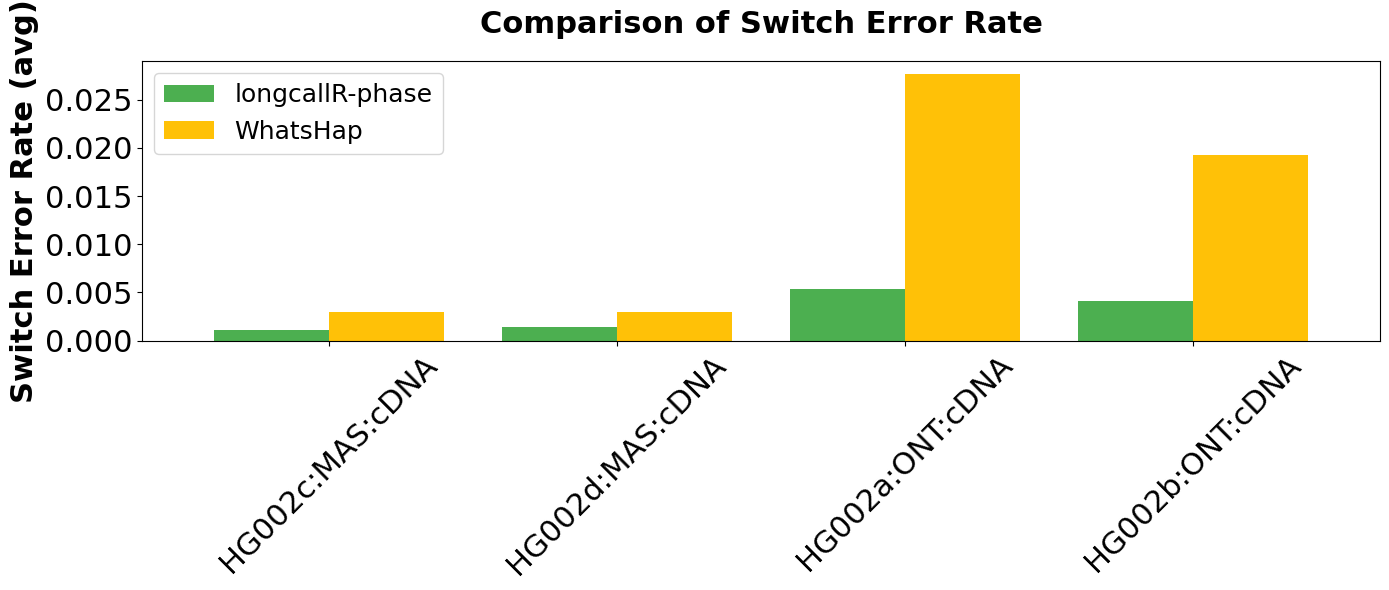

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for plotting
data = {
    "Samples": [
        "HG002c:MAS:cDNA",
        "HG002d:MAS:cDNA",
        "HG002a:ONT:cDNA",
        "HG002b:ONT:cDNA",
    ],
    "longcallR-phase": [0.001058367, 0.001369515, 0.005357451, 0.004077197],
    "WhatsHap": [0.002947244, 0.002994042, 0.027665633, 0.01929511],
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index("Samples", inplace=True)

# Modify x-axis labels to show in two lines
df.index = df.index.str.replace(" ", "\n")

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

# Bar plot with individual colors for better distinction
colors = ["#4CAF50", "#FFC107"]  # Green and Yellow for differentiation
df.plot(kind="bar", ax=ax, width=0.8, color=colors)

# Add labels and title
ax.set_ylabel("Switch Error Rate (avg)", fontsize=22, fontweight='bold')
ax.set_xlabel("")
ax.set_title(
    "Comparison of Switch Error Rate",
    fontsize=22,
    weight="bold",
    pad=20,
)
ax.legend(
    fontsize=18,
    loc="upper left",
)

# ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, fontsize=22)  # No tilt since labels are now multiline
plt.yticks(fontsize=22)

# Save plot
output_file = "Fig2c.svg"
plt.savefig(output_file, format="svg", bbox_inches="tight")

# Adjust layout to fit elements
plt.tight_layout()

# Show plot
plt.show()


#### Fig.2d

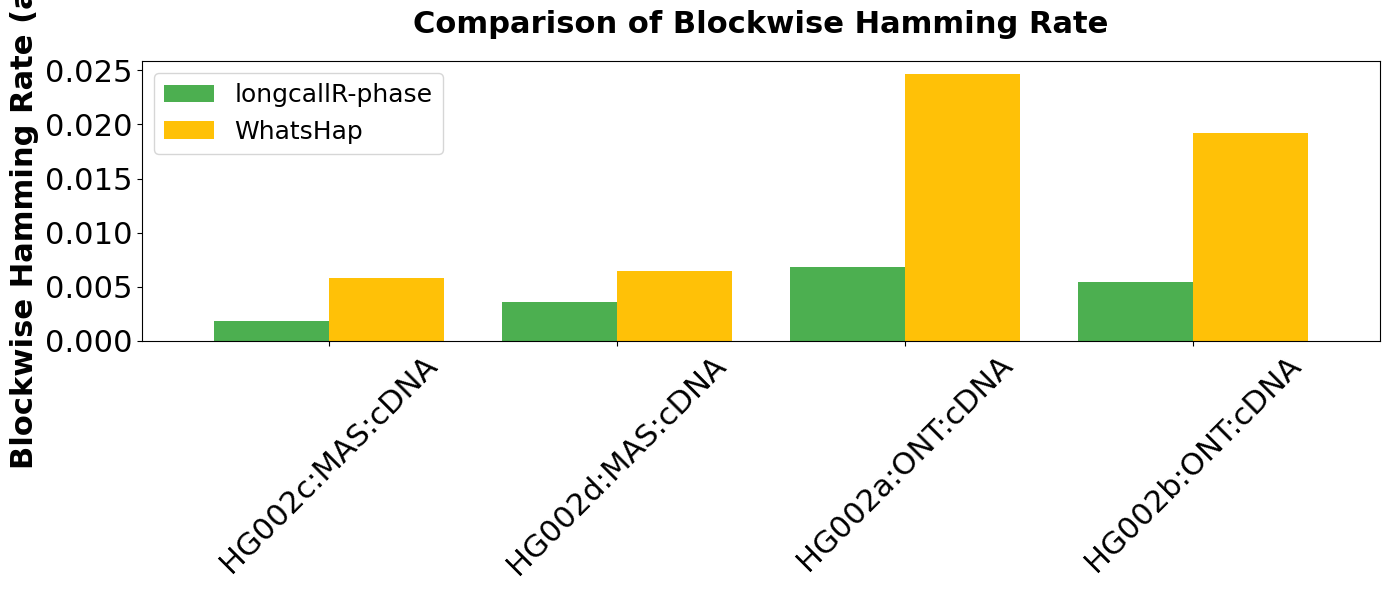

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for plotting blockwise Hamming rate
data_hamming = {
    "Samples": [
        "HG002c:MAS:cDNA",
        "HG002d:MAS:cDNA",
        "HG002a:ONT:cDNA",
        "HG002b:ONT:cDNA",
    ],
    "longcallR-phase": [0.001779681, 0.003523644, 0.006765646, 0.005457662],
    "WhatsHap": [0.005775166, 0.006455256, 0.024663497, 0.019217945],
}

# Create a DataFrame
df_hamming = pd.DataFrame(data_hamming)
df_hamming.set_index("Samples", inplace=True)

# Modify x-axis labels to show in two lines
df_hamming.index = df_hamming.index.str.replace(" ", "\n")

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

# Bar plot with individual colors for better distinction
colors = ["#4CAF50", "#FFC107"]  # Green for longcallR and Yellow for Whatshap
df_hamming.plot(kind="bar", ax=ax, width=0.8, color=colors)

# Add labels and title with increased font size
ax.set_ylabel("Blockwise Hamming Rate (avg)", fontsize=22, fontweight='bold')
ax.set_xlabel("")
ax.set_title(
    "Comparison of Blockwise Hamming Rate",
    fontsize=22,
    weight="bold",
    pad=20,
)

ax.legend(
    fontsize=18,
    loc="upper left",
)

# ax.grid(axis="y", linestyle="--", alpha=0.7)

# Customize tick font size
plt.xticks(rotation=45, fontsize=22)  # No rotation since labels are now multiline
plt.yticks(fontsize=22)

# Save plot
output_file = "Fig2d.svg"
plt.savefig(output_file, format="svg", bbox_inches="tight")

# Adjust layout to fit elements
plt.tight_layout()

# Show plot
plt.show()


#### Supp Table 6

In [18]:
import pandas as pd
gtf_file = "Phasing_results/clair3_longcallR/gm26105_masseq.gtf"
tsv_file = "Phasing_results/clair3_longcallR/gm26105_masseq.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 26207
all_switches: 147
all_switch_rate: 0.001166939
blockwise_hamming: 375
blockwise_hamming_rate: 0.002490045


In [19]:
import pandas as pd
gtf_file = "Phasing_results/clair3_whatshap/gm26105_masseq.gtf"
tsv_file = "Phasing_results/clair3_whatshap/gm26105_masseq.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 27488
all_switches: 290
all_switch_rate: 0.002441438
blockwise_hamming: 721
blockwise_hamming_rate: 0.004666531


In [20]:
import pandas as pd
gtf_file = "Phasing_results/clair3_longcallR/gm27730_masseq.gtf"
tsv_file = "Phasing_results/clair3_longcallR/gm27730_masseq.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 24569
all_switches: 160
all_switch_rate: 0.001248026
blockwise_hamming: 471
blockwise_hamming_rate: 0.003031397


In [21]:
import pandas as pd
gtf_file = "Phasing_results/clair3_whatshap/gm27730_masseq.gtf"
tsv_file = "Phasing_results/clair3_whatshap/gm27730_masseq.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 26263
all_switches: 309
all_switch_rate: 0.002402170
blockwise_hamming: 805
blockwise_hamming_rate: 0.005434677


In [22]:
import pandas as pd
gtf_file = "Phasing_results/clair3_longcallR/gm26105_pcs111.gtf"
tsv_file = "Phasing_results/clair3_longcallR/gm26105_pcs111.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 52051
all_switches: 88
all_switch_rate: 0.005639049
blockwise_hamming: 135
blockwise_hamming_rate: 0.006026203


In [23]:
import pandas as pd
gtf_file = "Phasing_results/clair3_whatshap/gm26105_pcs111.gtf"
tsv_file = "Phasing_results/clair3_whatshap/gm26105_pcs111.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 40367
all_switches: 210
all_switch_rate: 0.012019176
blockwise_hamming: 314
blockwise_hamming_rate: 0.013007655


In [24]:
import pandas as pd
gtf_file = "Phasing_results/clair3_longcallR/gm27730_pcs111.gtf"
tsv_file = "Phasing_results/clair3_longcallR/gm27730_pcs111.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 57016
all_switches: 104
all_switch_rate: 0.006133707
blockwise_hamming: 198
blockwise_hamming_rate: 0.008613817


In [25]:
import pandas as pd
gtf_file = "Phasing_results/clair3_whatshap/gm27730_pcs111.gtf"
tsv_file = "Phasing_results/clair3_whatshap/gm27730_pcs111.tsv"
csv_table = pd.read_table(tsv_file, sep="\t", index_col=None)
print("phaseblock n50: {}".format(get_whatshap_n50(gtf_file)))
print("all_switches: {}".format(csv_table['all_switches'].sum()))
print("all_switch_rate: {:.9f}".format(csv_table['all_switch_rate'].mean()))
print("blockwise_hamming: {}".format(csv_table['blockwise_hamming'].sum()))
print("blockwise_hamming_rate: {:.9f}".format(csv_table['blockwise_hamming_rate'].mean()))

phaseblock n50: 40865
all_switches: 217
all_switch_rate: 0.010590420
blockwise_hamming: 318
blockwise_hamming_rate: 0.011389354


## Allele-specific analysis

In [26]:
import pandas as pd
import numpy as np
def load_significant_asj_genes(asj_file, fc_threshold=2.0, pval_threshold=0.05):
    # Load data
    df = pd.read_csv(asj_file, header=0, delimiter="\t")
    df = df[~df["Chr"].isin(["chrX", "chrY", "chrM"])]

    # Create df1 and df2 with necessary columns
    df1 = df[["#Gene_name", "P_value", "SOR"]].copy()
    df1.loc[:, "P_value"] += 1e-30

    # Take SOR as Fold Change
    df1.loc[:, 'Ln Fold Change'] = df1['SOR']
    df1.loc[:, '-Log10 P-value'] = -np.log10(df1['P_value'])

    # Plot settings
    # fc_threshold = 2 # SOR>=2
    # pval_threshold = 0.05 # p-value threshold
    neg_log10_pval_threshold = -np.log10(pval_threshold)

    # Filter significant points for top 10 selection
    sig_df1 = df1[(df1['Ln Fold Change'] > fc_threshold) & (df1['-Log10 P-value'] > neg_log10_pval_threshold)]
    return sig_df1

#### Fig.3b

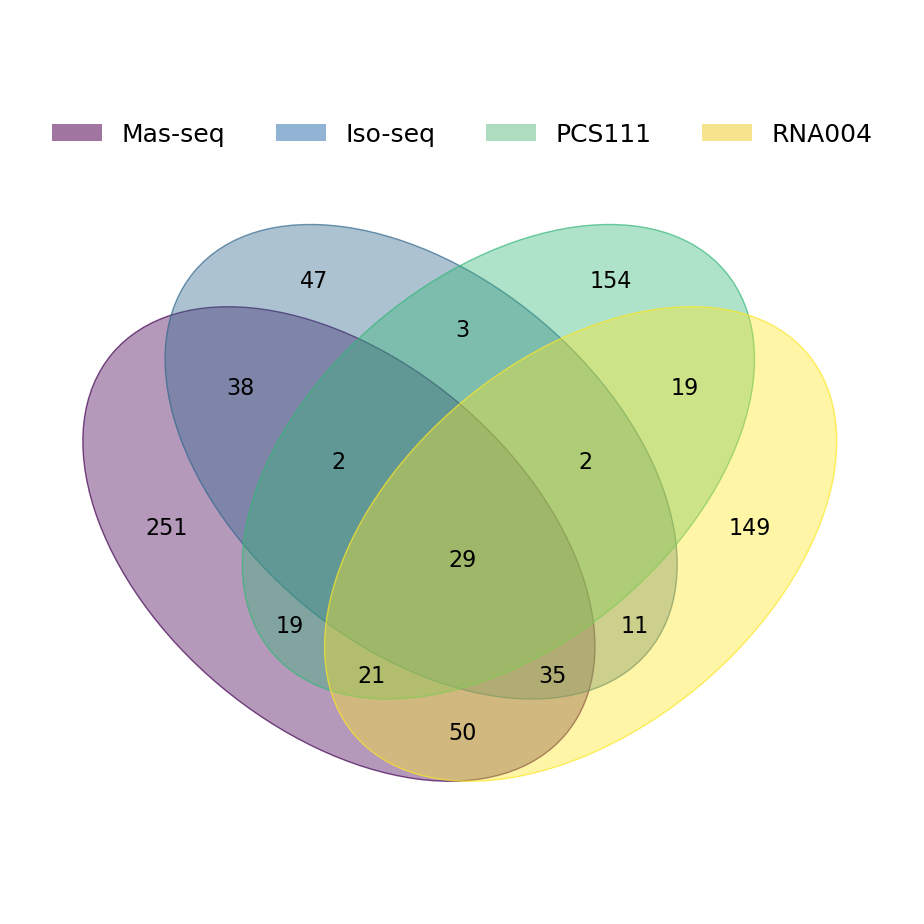

In [27]:
gm24385_masseq = load_significant_asj_genes("Allele_specific_results/GM24385_Masseq/gm24385_masseq_v39.filter.asj_gene.tsv")
gm24385_isoseq = load_significant_asj_genes("Allele_specific_results/GM24385_Isoseq/gm24385_isoseq_v39.filter.asj_gene.tsv")
gm24385_pcs111 = load_significant_asj_genes("Allele_specific_results/GM24385_PCS111/gm24385_pcs111_v39.filter.asj_gene.tsv")
hg002_drna004 = load_significant_asj_genes("Allele_specific_results/GM24385_dRNA004/hg002_drna004_v39.filter.asj_gene.tsv")

gm24385_masseq_genes = set(gm24385_masseq['#Gene_name'].tolist())
gm24385_isoseq_genes = set(gm24385_isoseq['#Gene_name'].tolist())
gm24385_pcs111_genes = set(gm24385_pcs111['#Gene_name'].tolist())
hg002_drna004_genes = set(hg002_drna004['#Gene_name'].tolist())

gene_sets = {
    "Mas-seq": gm24385_masseq_genes,
    "Iso-seq": gm24385_isoseq_genes,
    "PCS111": gm24385_pcs111_genes,
    "RNA004": hg002_drna004_genes,
}


# Plot
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from venn import venn
fig, ax = plt.subplots(figsize=(10,10))
v = venn(gene_sets, ax=ax)

# Change all text annotation font sizes
for text in ax.texts:
    text.set_fontsize(16)

# Set colors matching the venn output
legend_elements = [
    Patch(facecolor="#a076a1", label="Mas-seq"),   # purple
    Patch(facecolor="#92b4d4", label="Iso-seq"),   # blue
    Patch(facecolor="#aedcc0", label="PCS111"),   # green
    Patch(facecolor="#f5e38d", label="RNA004")   # yellow
]

# Add compact legend inside top-left
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.9),
    ncol=4,
    fontsize=18,
    frameon=False
)
plt.tight_layout()
plt.savefig("Fig3b.svg", format="svg")
plt.show()

#### Supp Fig 2

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def compute_stacked_hist(specific, common, bins):
    spec_hist, _ = np.histogram(specific, bins=bins)
    comm_hist, _ = np.histogram(common, bins=bins)
    return spec_hist, comm_hist

def plot_stacked(ax, specific, common, bins, title, spec_label, comm_label):
    spec_hist, comm_hist = compute_stacked_hist(specific, common, bins)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    width = np.diff(bins)

    ax.bar(bin_centers, spec_hist, width=width, label=spec_label, edgecolor='black', align='center')
    ax.bar(bin_centers, comm_hist, bottom=spec_hist, width=width, label=comm_label, edgecolor='black', align='center')
    ax.set_xscale('log')
    ax.set_xlabel('P-value')
    ax.set_ylabel('Frequency')
    # ax.set_title(title)
    ax.legend()

In [29]:
masseq_specific_genes = gm24385_masseq_genes - (gm24385_isoseq_genes | gm24385_pcs111_genes | hg002_drna004_genes)
isoseq_specific_genes = gm24385_isoseq_genes - (gm24385_masseq_genes | gm24385_pcs111_genes | hg002_drna004_genes)
pcs111_specific_genes = gm24385_pcs111_genes - (gm24385_masseq_genes | gm24385_isoseq_genes | hg002_drna004_genes)
drna004_specific_genes = hg002_drna004_genes - (gm24385_masseq_genes | gm24385_isoseq_genes | gm24385_pcs111_genes)

masseq_common_genes = gm24385_masseq_genes & (gm24385_isoseq_genes | gm24385_pcs111_genes | hg002_drna004_genes)
isoseq_common_genes = gm24385_isoseq_genes & (gm24385_masseq_genes | gm24385_pcs111_genes | hg002_drna004_genes)
pcs111_common_genes = gm24385_pcs111_genes & (gm24385_masseq_genes | gm24385_isoseq_genes | hg002_drna004_genes)
drna004_common_genes = hg002_drna004_genes & (gm24385_masseq_genes | gm24385_isoseq_genes | gm24385_pcs111_genes)

masseq_specific_pvalues = gm24385_masseq[gm24385_masseq["#Gene_name"].isin(masseq_specific_genes)]["P_value"]
isoseq_specific_pvalues = gm24385_isoseq[gm24385_isoseq["#Gene_name"].isin(isoseq_specific_genes)]["P_value"]
pcs111_specific_pvalues = gm24385_pcs111[gm24385_pcs111["#Gene_name"].isin(pcs111_specific_genes)]["P_value"]
drna004_specific_pvalues = hg002_drna004[hg002_drna004["#Gene_name"].isin(drna004_specific_genes)]["P_value"]


masseq_common_pvalues = gm24385_masseq[gm24385_masseq["#Gene_name"].isin(masseq_common_genes)]["P_value"]
isoseq_common_pvalues = gm24385_isoseq[gm24385_isoseq["#Gene_name"].isin(isoseq_common_genes)]["P_value"]
pcs111_common_pvalues = gm24385_pcs111[gm24385_pcs111["#Gene_name"].isin(pcs111_common_genes)]["P_value"]
drna004_common_pvalues = hg002_drna004[hg002_drna004["#Gene_name"].isin(drna004_common_genes)]["P_value"]

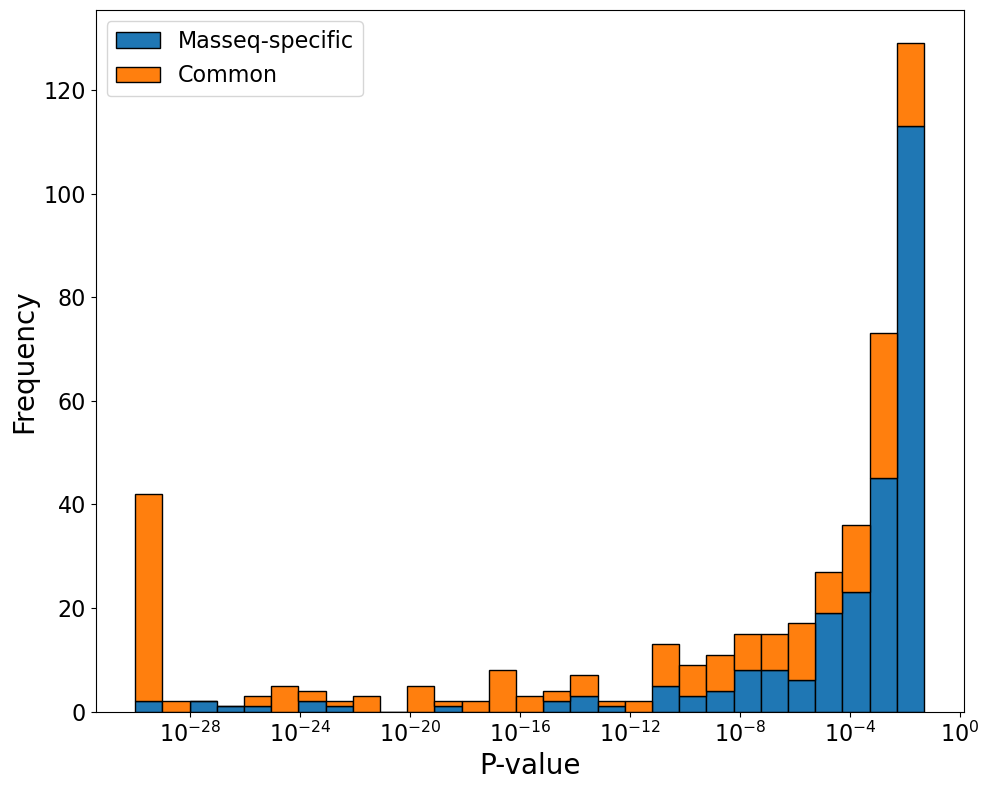

In [30]:
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Set log-spaced bins
bins_masseq = np.logspace(np.log10(min(masseq_specific_pvalues.min(), masseq_common_pvalues.min())),
                          np.log10(max(masseq_specific_pvalues.max(), masseq_common_pvalues.max())),
                          30)
plot_stacked(ax, masseq_specific_pvalues, masseq_common_pvalues, bins_masseq,
             'Masseq P-value Distribution', 'Masseq-specific', 'Common')

# Update axis settings and font sizes
ax.set_xscale('log')
# ax.set_title('Distribution of p-values for ASJ genes in GM24385 human cell lines acorss different sequencing technologies', fontsize=20)
ax.set_xlabel('P-value', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=16)

plt.tight_layout()
# plt.savefig("platform-specific-pvalues.svg", format="svg")
plt.savefig("Supp_fig2.svg")
# plt.savefig("Supp_fig2.pdf")
plt.show()

#### Fig.3c

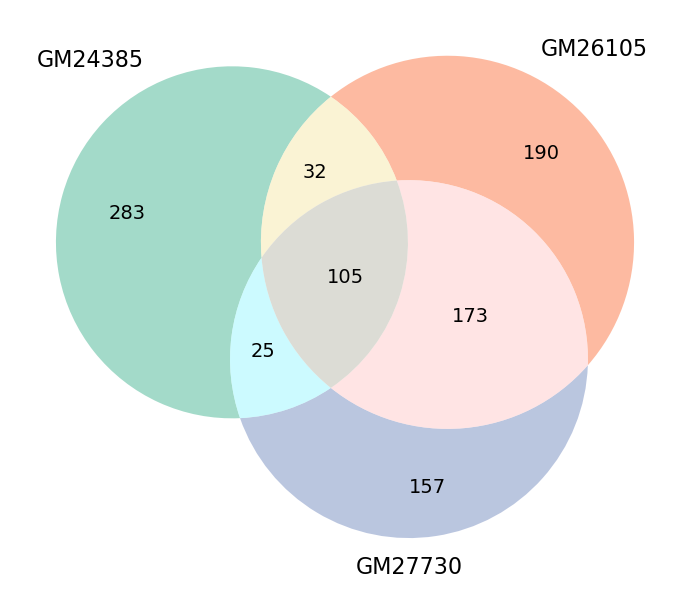

In [31]:
gm24385 = load_significant_asj_genes("Allele_specific_results/GM24385_Masseq/gm24385_masseq_v39.filter.asj_gene.tsv")
gm26105 = load_significant_asj_genes("Allele_specific_results/GM26105_Masseq/gm26105_masseq_v39.filter.asj_gene.tsv")
gm27730 = load_significant_asj_genes("Allele_specific_results/GM27730_Masseq/gm27730_masseq_v39.filter.asj_gene.tsv")

gm24385_genes = set(gm24385['#Gene_name'].tolist())
gm26105_genes = set(gm26105['#Gene_name'].tolist())
gm27730_genes = set(gm27730['#Gene_name'].tolist())


# # Draw Venn diagram
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # green, orange, blue

plt.figure(figsize=(7, 7))
v = venn3([gm24385_genes, gm26105_genes, gm27730_genes],
          set_labels=('GM24385', 'GM26105', 'GM27730'),
          set_colors=colors, alpha=0.6)
for text in v.set_labels:
    if text:
        text.set_fontsize(16)
        # text.set_fontweight("bold")
for text in v.subset_labels:
    if text:
        text.set_fontsize(14)
plt.tight_layout()
plt.savefig("Fig3c.svg", format='svg')
plt.show()

#### Supp Fig 3

In [32]:
gm24385_specific_genes = gm24385_genes - (gm26105_genes | gm27730_genes)
gm26105_specific_genes = gm26105_genes - (gm24385_genes | gm27730_genes)
gm27730_specific_genes = gm27730_genes - (gm24385_genes | gm26105_genes)

gm24385_common_genes = gm24385_genes & (gm26105_genes | gm27730_genes)
gm26105_common_genes = gm26105_genes & (gm24385_genes | gm27730_genes)
gm27730_common_genes = gm27730_genes & (gm24385_genes | gm26105_genes)

gm24385_specific_pvalues = gm24385[gm24385["#Gene_name"].isin(gm24385_specific_genes)]["P_value"]
gm26105_specific_pvalues = gm26105[gm26105["#Gene_name"].isin(gm26105_specific_genes)]["P_value"]
gm27730_specific_pvalues = gm27730[gm27730["#Gene_name"].isin(gm27730_specific_genes)]["P_value"]


gm24385_common_pvalues = gm24385[gm24385["#Gene_name"].isin(gm24385_common_genes)]["P_value"]
gm26105_common_pvalues = gm26105[gm26105["#Gene_name"].isin(gm26105_common_genes)]["P_value"]
gm27730_common_pvalues = gm27730[gm27730["#Gene_name"].isin(gm27730_common_genes)]["P_value"]

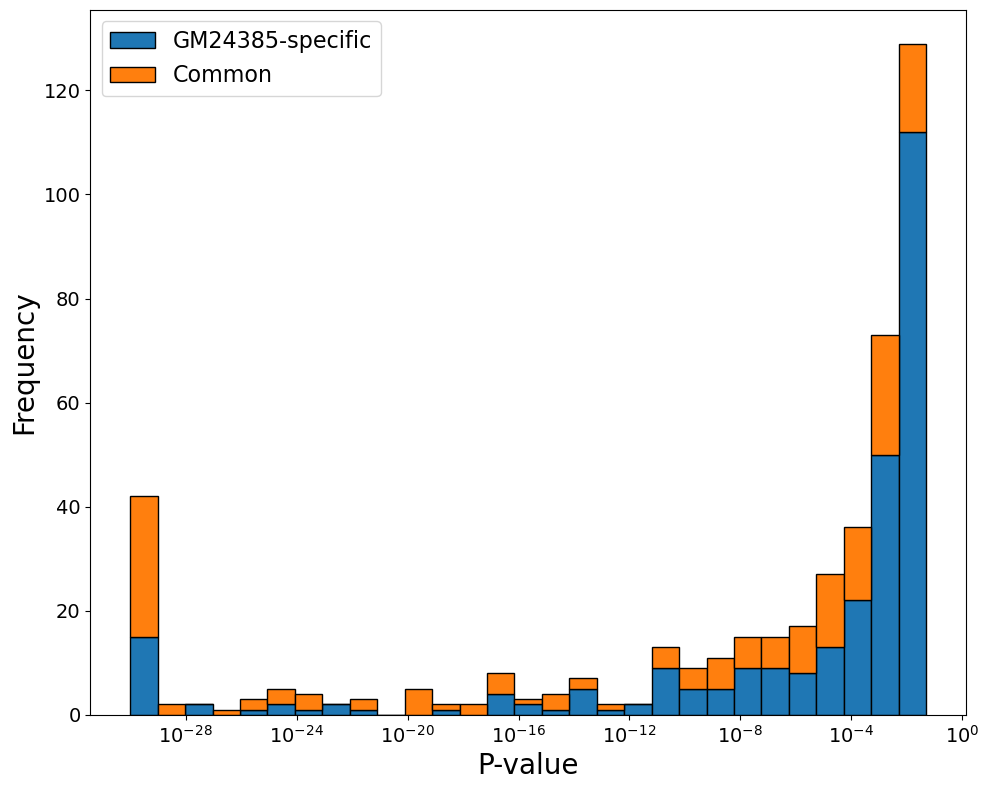

In [33]:


plt.figure(figsize=(10, 8))
ax = plt.gca()

# Set log-spaced bins
bins_gm24385 = np.logspace(
    np.log10(min(gm24385_specific_pvalues.min(), gm24385_common_pvalues.min())),
    np.log10(max(gm24385_specific_pvalues.max(), gm24385_common_pvalues.max())),
    30
)

# Custom plotting (assumes plot_stacked uses ax for plotting)
plot_stacked(ax, gm24385_specific_pvalues, gm24385_common_pvalues, bins_gm24385,
             'GM24385 P-value Distribution', 'GM24385-specific', 'Common')

# Update axis settings and font sizes
ax.set_xscale('log')
# ax.set_title('GM24385-specific ASJ genes P-value Distribution', fontsize=20)
ax.set_xlabel('P-value', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
# plt.savefig("cell-type-specific-pvalues.svg", format="svg")
plt.savefig("Supp_fig3.svg")
# plt.savefig("Supp_fig3.pdf")
plt.show()

#### Supp Fig 4

In [34]:
import pandas as pd

gm24385_gene_coverage = pd.read_csv("Allele_specific_results/GM24385_Masseq/gm24385_masseq_v39.filter.gene_coverage.tsv", header=0, delimiter="\t")
gm26105_gene_coverage = pd.read_csv("Allele_specific_results/GM26105_Masseq/gm26105_masseq_v39.filter.gene_coverage.tsv", header=0, delimiter="\t")
gm27730_gene_coverage = pd.read_csv("Allele_specific_results/GM27730_Masseq/gm27730_masseq_v39.filter.gene_coverage.tsv", header=0, delimiter="\t")

gm24385_specific_coverages = gm24385_gene_coverage[gm24385_gene_coverage["#Gene_name"].isin(gm24385_specific_genes)]["Num_reads"]
gm26105_coverages = gm26105_gene_coverage[gm26105_gene_coverage["#Gene_name"].isin(gm24385_specific_genes)]["Num_reads"]
gm27730_coverages = gm27730_gene_coverage[gm27730_gene_coverage["#Gene_name"].isin(gm24385_specific_genes)]["Num_reads"]

/var/folders/4d/wrrktx09407f1m44m29zk1x40000gp/T/ipykernel_97332/1249715885.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showfliers=False, patch_artist=True,


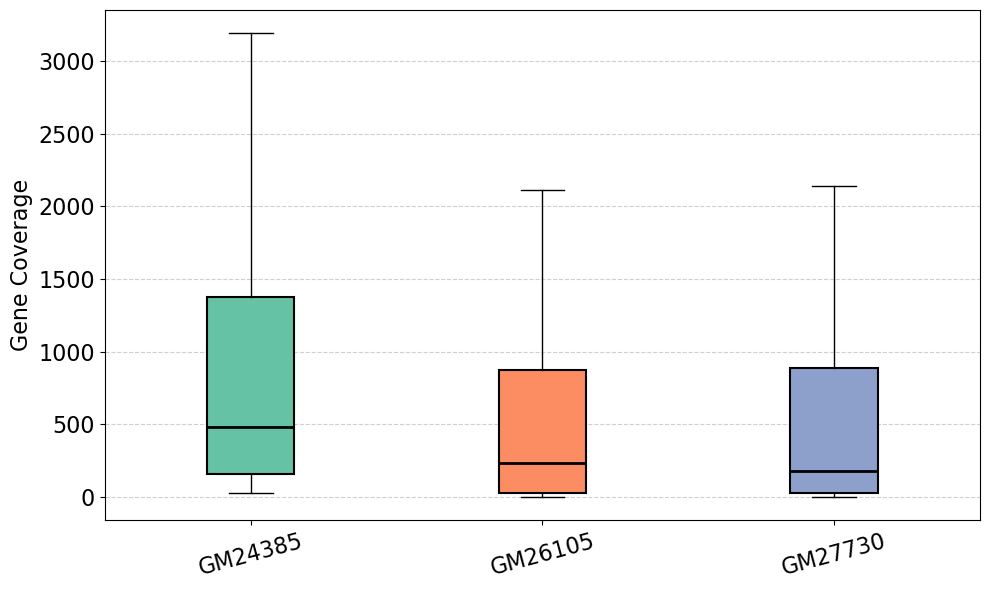

In [35]:
import matplotlib.pyplot as plt

# Data and labels
data = [
    gm24385_specific_coverages,
    gm26105_coverages,
    gm27730_coverages
]
labels = [
    "GM24385",
    "GM26105",
    "GM27730"
]

# Plot
plt.figure(figsize=(10, 6))
box = plt.boxplot(data, labels=labels, showfliers=False, patch_artist=True,
                  medianprops=dict(color='black', linewidth=2))

# Apply custom colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)


plt.ylabel("Gene Coverage", fontsize=16)
# plt.title("Box Plot of Coverage for GM24385-Specific Genes Across Samples", fontsize=16, fontweight='bold')
plt.xticks(rotation=15, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
# plt.savefig("cell-type-coverages.svg", format="svg")
plt.savefig("Supp_fig4.svg")
# plt.savefig("Supp_fig4.pdf")
plt.show()

#### Supp Fig 1

In [36]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("Allele_specific_results/GM24385_Masseq/gm24385_masseq_v39.filter.asj_gene.tsv", header=0, delimiter="\t")
df = df[~df["Chr"].isin(["chrX", "chrY", "chrM"])]

# Create df1 and df2 with necessary columns
df1 = df[["#Gene_name", "P_value", "SOR"]].copy()
df1.loc[:, "P_value"] += 1e-30
# df1.loc[:, "SOR"] += 1e-300

# Take SOR as Fold Change
df1.loc[:, 'Ln Fold Change'] = df1['SOR']
df1.loc[:, '-Log10 P-value'] = -np.log10(df1['P_value'])
# df1.loc[:, '-Log10 P-value'] = np.minimum(-np.log10(df1['P_value']),40)

# Plot settings
fc_threshold = 2 # SOR>=2
pval_threshold = 0.05 # p-value threshold
neg_log10_pval_threshold = -np.log10(pval_threshold)

top_k = 10

# Filter significant points for top 10 selection
sig_df1 = df1[(df1['Ln Fold Change'] > fc_threshold) & (df1['-Log10 P-value'] > neg_log10_pval_threshold)]
# Select top 10 most significant points for each figure
top_sig_df1 = sig_df1.nlargest(top_k, '-Log10 P-value')
sig_mask_df1 = (df1['Ln Fold Change'] > fc_threshold) & (df1['-Log10 P-value'] > neg_log10_pval_threshold)

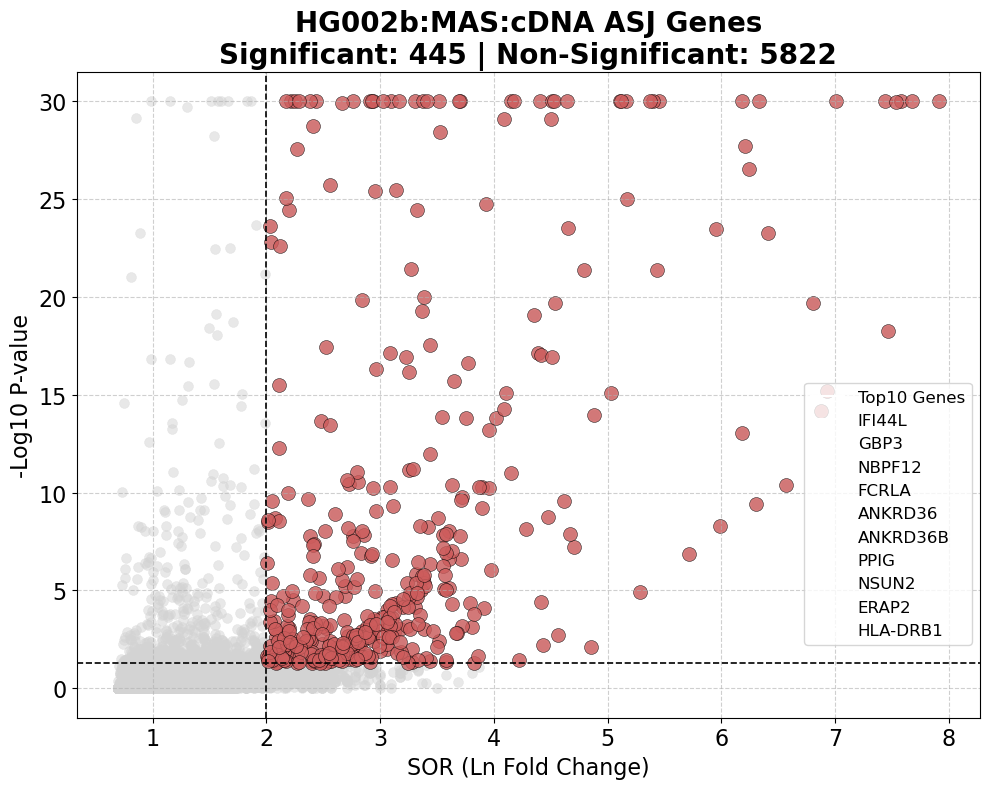

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot non-significant points
plt.scatter(
    df1['Ln Fold Change'], 
    df1['-Log10 P-value'], 
    color="lightgrey", 
    label="Non-Significant", 
    alpha=0.5, 
    s=50,
    linewidth=0.4
)

# Plot significant points
plt.scatter(
    df1[sig_mask_df1]['Ln Fold Change'], 
    df1[sig_mask_df1]['-Log10 P-value'], 
    color="indianred", 
    edgecolor="black",
    label="Significant", 
    alpha=0.8, 
    s=100,
    linewidth=0.4
)

# Add threshold lines
plt.axhline(
    y=neg_log10_pval_threshold, 
    color='black', 
    linestyle='--', 
    linewidth=1.2, 
    # label=f"P-value Threshold ({neg_log10_pval_threshold:.2f})"
)
plt.axvline(
    x=fc_threshold, 
    color='black', 
    linestyle='--', 
    linewidth=1.2, 
    # label=f"Fold Change Threshold (+/- {fc_threshold:.2f})"
)

# Customize title and labels
plt.title(
    f"HG002b:MAS:cDNA ASJ Genes\n"
    f"Significant: {sig_df1.shape[0]} | Non-Significant: {df1.shape[0] - sig_df1.shape[0]}",
    fontsize=20,
    fontweight='bold'
)
plt.xlabel("SOR (Ln Fold Change)", fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel("-Log10 P-value", fontsize=16)
plt.yticks(fontsize=16)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Create custom legend
legend_handles = [
    # plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgrey', markersize=10, label='Non-significant'),
    # plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Significant'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=0, label='Top10 Genes')
] + [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=0, label=gene) 
    for gene in top_sig_df1['#Gene_name'][:top_k]
]

plt.legend(
    handles=legend_handles, 
    # title=f"Top {top_k} Genes", 
    fontsize=12, 
    title_fontsize=10, 
    loc='lower right', 
    bbox_to_anchor=(1, 0.1), 
    # frameon=False
)

# Optimize layout and save the plot
plt.tight_layout()
plt.savefig('Supp_fig1.svg')
# plt.savefig('Supp_fig1.pdf')
plt.show()

## HPRC samples

In [38]:
import pandas as pd
def load_metadata(meta_file):
    df = pd.read_csv(meta_file, sep='\t', index_col='GenomeID')
    return df

metafile="250218.HPRCR2.GenomeInfo.tsv"
biosample=load_metadata(metafile)
biosample["Superpopulation"].value_counts()

Superpopulation
AFR    83
EAS    48
SAS    45
AMR    42
EUR    36
Name: count, dtype: int64

#### Fig.3d

In [39]:
import os
import pandas as pd

result_dir = "HPRC_samples"
all_samples = []
all_gene_sets = []
data = {}

p_threshold=1e-10
min_samples=1


for sample in os.listdir(result_dir):
    tsv_file = os.path.join(result_dir, sample, sample + ".asj_gene.tsv")
    if os.path.exists(tsv_file):
        df = load_significant_asj_genes(tsv_file, 2.0, p_threshold)
        gene_pval_dict = dict(zip(df["#Gene_name"], df["P_value"]))
        if sample == "HG02976" or sample == "NA18505":
            continue
        data[sample] = gene_pval_dict
all_genes = set()
for gene_pvals in data.values():
    all_genes.update(gene_pvals.keys())

# Step 3: Create DataFrame with sample × gene, filled with NaN where missing
df_matrix = pd.DataFrame.from_dict(data, orient='index')
df_matrix = df_matrix.loc[:, df_matrix.notna().sum()>=min_samples]

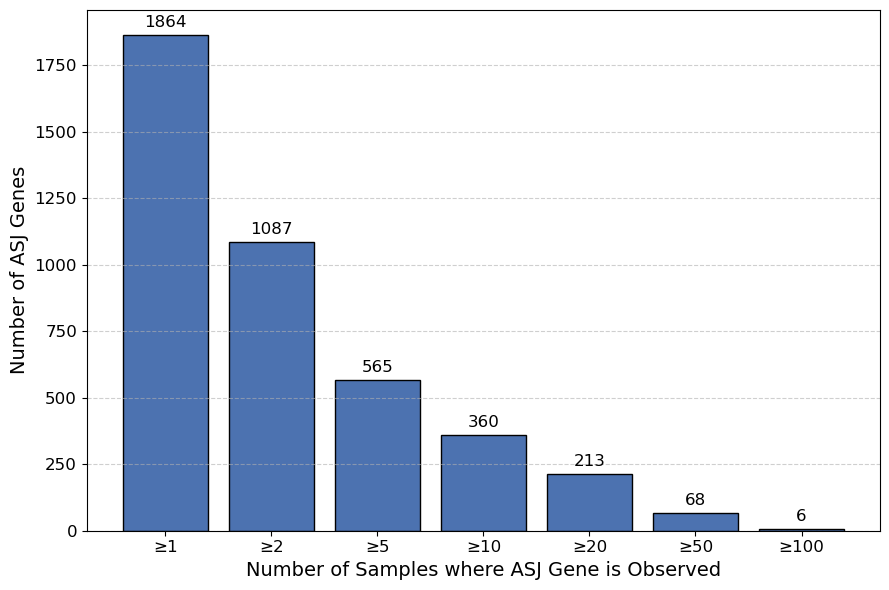

In [40]:
import matplotlib.pyplot as plt

# Compute gene presence across samples
gene_presence_counts = df_matrix.notna().sum(axis=0)

# Define thresholds and count how many genes meet each
thresholds = [1, 2, 5, 10, 20, 50, 100]
labels = [f'≥{t}' for t in thresholds]
counts = [(gene_presence_counts >= t).sum() for t in thresholds]

# Plot
plt.figure(figsize=(9, 6))
bars = plt.bar(labels, counts, color='#4C72B0', edgecolor='black')

# Titles and labels
# plt.title('ASJ Gene Prevalence Across Samples', fontsize=16, fontweight='bold')
plt.xlabel('Number of Samples where ASJ Gene is Observed', fontsize=14)
plt.ylabel('Number of ASJ Genes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add data labels
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + max(counts) * 0.01,  # dynamic vertical offset
             str(count),
             ha='center', va='bottom',
             fontsize=12)

plt.tight_layout()
plt.savefig("Fig3d.svg", format="svg")
plt.show()

#### Fig.3e

In [41]:
import os
import pandas as pd

result_dir = "HPRC_samples"
all_samples = []
all_gene_sets = []
data = {}

pvalue_threshold=0.05
min_sample=5


for sample in os.listdir(result_dir):
    tsv_file = os.path.join(result_dir, sample, sample + ".asj_gene.tsv")
    if os.path.exists(tsv_file):
        df = load_significant_asj_genes(tsv_file, 2.0, pvalue_threshold)
        # df = load_significant_asj_genes(tsv_file, sor_threshold, p_threshold)
        gene_pval_dict = dict(zip(df["#Gene_name"], df["P_value"]))
        if sample == "HG02976" or sample == "NA18505":
            continue
        data[sample] = gene_pval_dict

all_genes = set()
for gene_pvals in data.values():
    all_genes.update(gene_pvals.keys())

# Step 3: Create DataFrame with sample × gene, filled with NaN where missing
df_matrix = pd.DataFrame.from_dict(data, orient='index')
df_matrix = df_matrix.loc[:, df_matrix.notna().sum()>=min_sample]

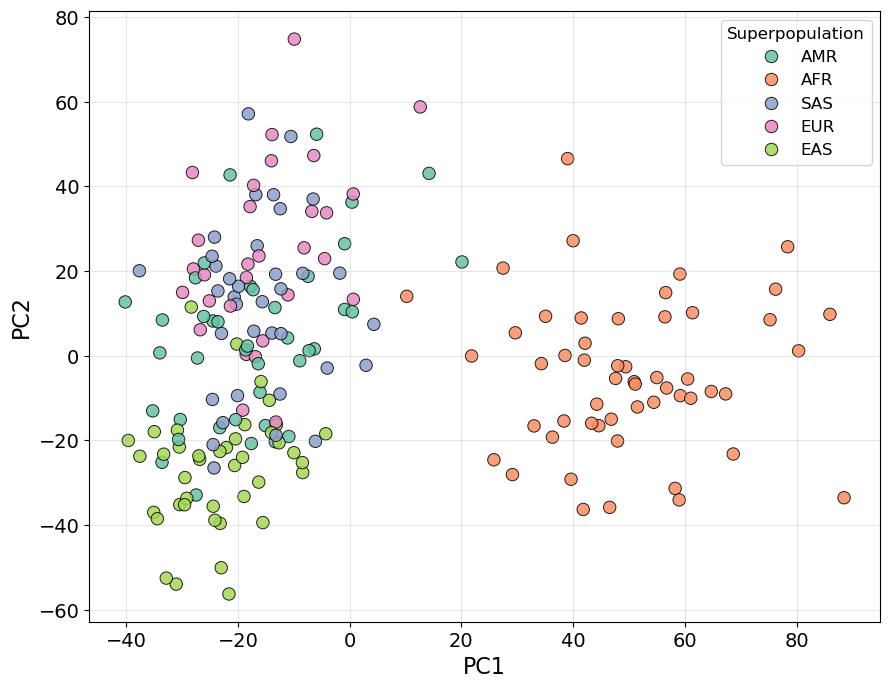

In [42]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Transform p-values to -log10(p)
pval_matrix = -np.log10(df_matrix.copy())

# Step 2: Drop specific samples
pval_matrix = pval_matrix.drop(index=["HG02976", "NA18505"], errors='ignore')

# Step 3: Fill NaNs with 0 (equivalent to p=1)
pval_matrix = pval_matrix.fillna(0)

# Step 4: Retrieve superpopulation metadata
superpop = biosample.loc[pval_matrix.index, "Superpopulation"]

# Step 5: PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pval_matrix)
explained_var = pca.explained_variance_ratio_ * 100

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=pval_matrix.index)
pca_df["superpop"] = superpop

# Step 6: Plot
plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="superpop",
    palette="Set2",
    s=80,
    edgecolor='black',
    alpha=0.85
)

plt.xlabel(f"PC1", fontsize=16)
plt.ylabel(f"PC2", fontsize=16)
plt.legend(title="Superpopulation", fontsize=12, title_fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Fig3e.svg", format='svg')
plt.show()

#### Fig.3f

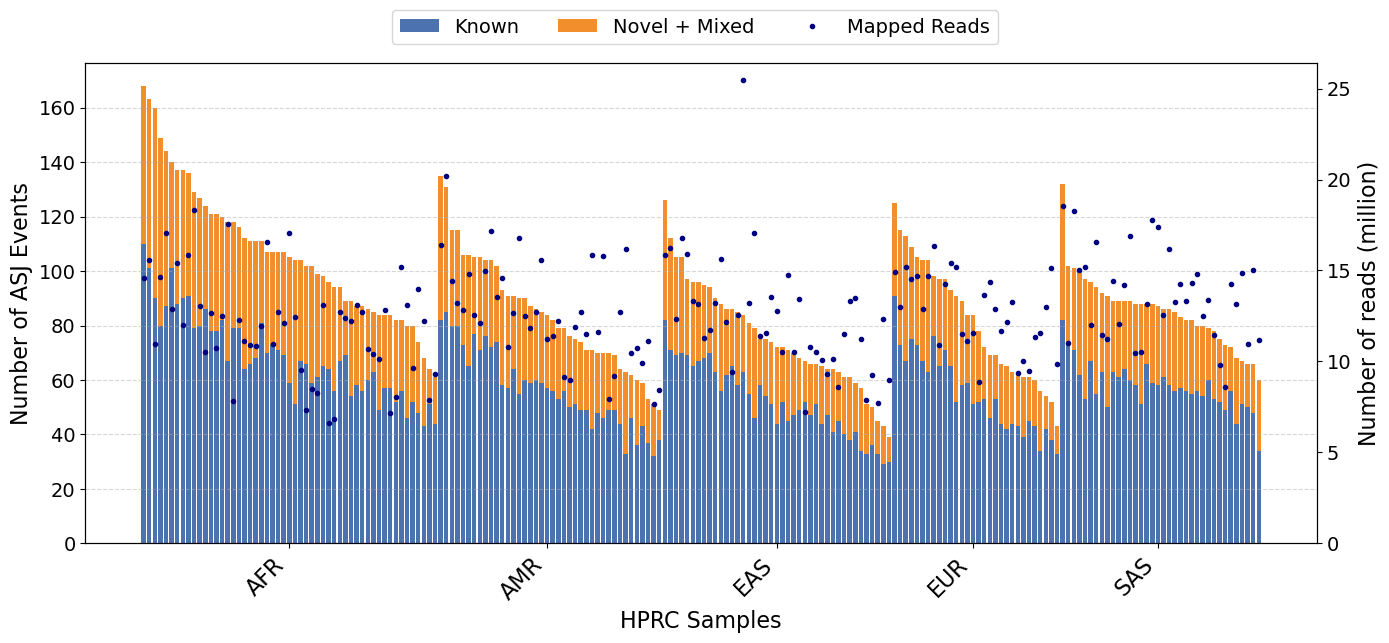

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os

result_dir = "HPRC_samples"
p_value_threshold = 1e-10
sor_threshold = 2.0

data = []

for sample in os.listdir(result_dir):
    if sample in {"HG02976", "NA18505"}:
        continue

    df = pd.read_csv(f'{result_dir}/{sample}/{sample}.asj.tsv', delimiter='\t', low_memory=False)
    sign_df = df[(df["P_value"] < p_value_threshold) & (df["SOR"] >= sor_threshold) & (df["GT_AG"])]

    purely_known = set()
    purely_novel = set()
    mixed = set()

    for js in sign_df["Junction_set"].unique():
        js_df = sign_df[sign_df["Junction_set"] == js]
        if js_df["Novel"].all():
            purely_novel.add(js)
        elif not js_df["Novel"].any():
            purely_known.add(js)
        else:
            mixed.add(js)

    known_count = len(purely_known)
    novel_count = len(purely_novel)
    mixed_count = len(mixed)
    total = known_count + novel_count + mixed_count
    data.append((sample, known_count, novel_count + mixed_count, total))

# Create DataFrame
plot_df = pd.DataFrame(data, columns=["Sample", "Purely Known", "Novel + Mixed", "Total"])
plot_df = plot_df.sort_values("Total", ascending=False)

# Load data
sample_reads_count = pd.read_csv("sample_reads_count.tsv", header=None, names=["Sample", "Reads"], sep=" ")

if "Reads" in plot_df.columns:
    plot_df = plot_df.drop(columns=["Reads"])

# Now merge safely
plot_df = plot_df.merge(sample_reads_count, on="Sample", how="left")

# Ensure Superpopulation info
if "Superpopulation" not in plot_df.columns:
    plot_df = plot_df.merge(biosample[["Superpopulation"]], left_on="Sample", right_index=True)

# Sort by Superpopulation then ASJ count
plot_df = plot_df.sort_values(by=["Superpopulation", "Total"], ascending=[True, False]).reset_index(drop=True)

# Identify xticks for superpop labels
xtick_positions = []
xtick_labels = []

for pop in plot_df["Superpopulation"].unique():
    indices = plot_df.index[plot_df["Superpopulation"] == pop].tolist()
    center = int((indices[0] + indices[-1]) / 2)
    xtick_positions.append(center)
    xtick_labels.append(pop)


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 6))

# Stacked bar plot for ASJ events
bar1 = ax1.bar(range(len(plot_df)), plot_df["Purely Known"], label="Known", color="#4C72B0")
bar2 = ax1.bar(range(len(plot_df)), plot_df["Novel + Mixed"], 
               bottom=plot_df["Purely Known"], label="Novel + Mixed", color="#F28E2B")

ax1.set_ylabel("Number of ASJ Events", fontsize=16)
ax1.set_xlabel("HPRC Samples", fontsize=16)
ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=16)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Convert reads to millions
plot_df["Reads_M"] = plot_df["Reads"] / 1e6

# Plot on second Y axis
ax2 = ax1.twinx()
ax2.plot(range(len(plot_df)), plot_df["Reads_M"], color="navy", marker='o', linestyle='None', markersize=3, label="Mapped Reads")
ax2.set_ylabel("Number of reads (million)", fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylim(bottom=0)

# Remove scientific notation
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax2.ticklabel_format(style='plain', axis='y')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3, fontsize=14)

# plt.savefig("population_ASJ_events.svg", format="svg")
plt.savefig("population_ASJ_events.svg", format="svg", bbox_inches='tight')
plt.tight_layout()
plt.show()

#### Supp Fig 5

/var/folders/4d/wrrktx09407f1m44m29zk1x40000gp/T/ipykernel_97332/2223832332.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x="Superpopulation", y="Total", palette="Set2")


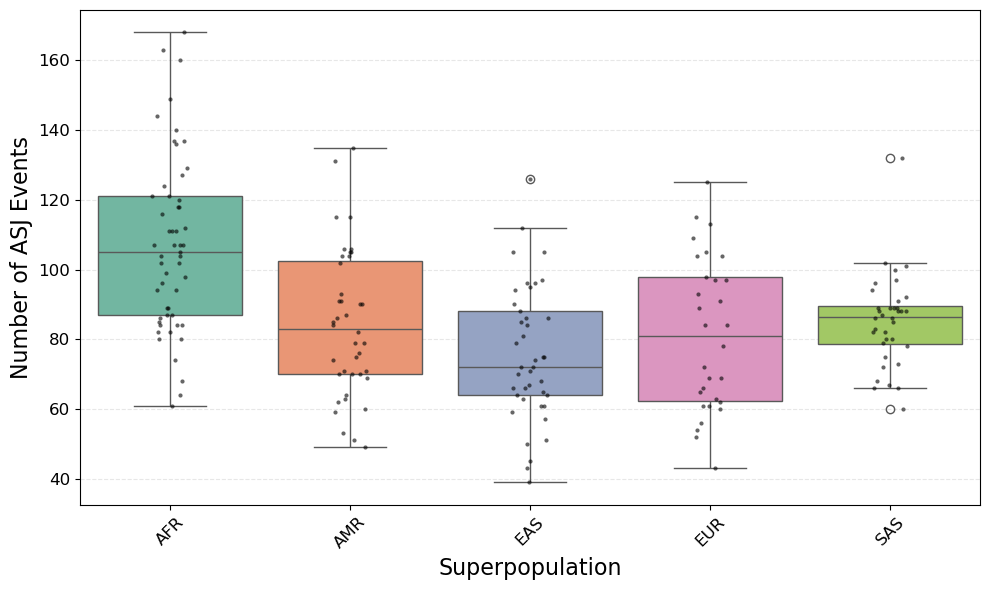

In [44]:
import seaborn as sns

# Ensure Superpopulation is in the DataFrame
if "Superpopulation" not in plot_df.columns:
    plot_df = plot_df.merge(biosample[["Superpopulation"]], left_on="Sample", right_index=True)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=plot_df, x="Superpopulation", y="Total", palette="Set2")


# Optionally overlay actual sample values as dots
sns.stripplot(data=plot_df, x="Superpopulation", y="Total", color='black', size=3, jitter=True, alpha=0.6)

# Labels and styling
plt.xlabel("Superpopulation", fontsize=16)
plt.ylabel("Number of ASJ Events", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
# plt.title("Distribution of ASJ Events by Superpopulation", fontsize=16)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
# plt.savefig("population_asj_box.svg", format="svg")
plt.savefig("Supp_fig5.svg")
# plt.savefig("Supp_fig5.pdf")
plt.show()

#### Supp Fig 6

/var/folders/4d/wrrktx09407f1m44m29zk1x40000gp/T/ipykernel_97332/996643458.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reads_df, x="Superpopulation", y="Reads", palette="Set2", showfliers=False)


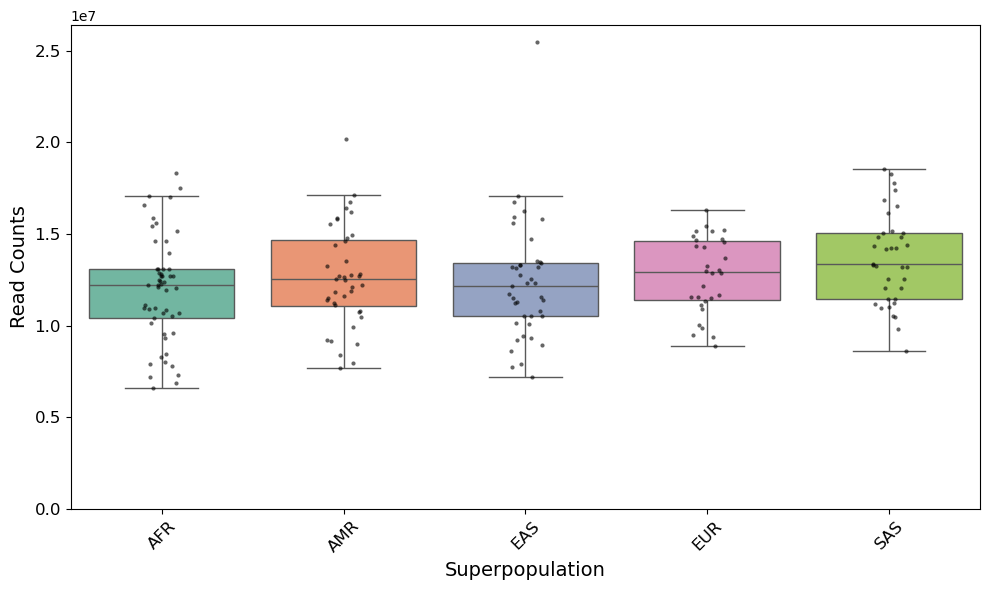

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge read counts with biosample metadata
reads_df = sample_reads_count.merge(biosample[["Superpopulation"]], left_on="Sample", right_index=True)

# remove HG02976 and NA18505
reads_df = reads_df[~reads_df["Sample"].isin(["HG02976", "NA18505"])]


# Sort superpopulations alphabetically (optional)
reads_df = reads_df.sort_values("Superpopulation")

# Create boxplot
plt.figure(figsize=(10, 6))

# Boxplot without outliers
sns.boxplot(data=reads_df, x="Superpopulation", y="Reads", palette="Set2", showfliers=False)

# Optional: overlay raw data points
sns.stripplot(data=reads_df, x="Superpopulation", y="Reads", color='black', size=3, jitter=True, alpha=0.6)

# Axis labels and styling
plt.xlabel("Superpopulation", fontsize=14)
plt.ylabel("Read Counts", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(bottom=0)
# plt.title("Distribution of Mapped Reads by Superpopulation", fontsize=16)
# plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
# plt.savefig("population_coverage_box.svg", format="svg")
plt.savefig("Supp_fig6.svg")
# plt.savefig("Supp_fig6.pdf")
plt.show()

In [ ]:
import os
result_dir = "HPRC_samples"
total_sample_count=0
total_events=0
total_novel=0
total_known=0
total_mixed=0

known_pvalues = []
novel_pvalues = []
polulation_asj_events = []
polulation_significant_asj_events = []
p_value_threshold = 1e-10
sor_threshold = 2.0
for sample in os.listdir(result_dir):
    if sample == "HG02976" or sample == "NA18505":
            continue
    df = pd.read_csv(f'{result_dir}/{sample}/{sample}.asj.tsv', header=0, delimiter="\t")
    df = df[~df["#Junction"].str.startswith(("chrX", "chrY", "chrM"))].reset_index(drop=True)
    df = df[df["GT_AG"]]

    all_junction_events = df["Junction_set"].unique()
    all_asj_events = df[(df["P_value"]<0.05)]["Junction_set"].unique() # p<0.05
    non_asj_events = set(all_junction_events)-set(all_asj_events) # p>=0.05
    significant_asj_events = df[(df["P_value"]<1e-10) & (df["SOR"]>=2.0)]["Junction_set"].unique() # p<1e-10 and sor>=2
    insignificant_asj_events = set(all_asj_events)-set(significant_asj_events) # p<0.05 and (p>=1e-10 or sor<2)

    # Pre-group df for fast access
    df_group = df.groupby("Junction_set")

    purely_novel_junction_set = set()
    purely_known_junction_set = set()
    mixed_junction_set = set()
    
    purely_novel_insignificant_ASJ = set()
    purely_known_insignificant_ASJ = set()
    mixed_insignificant_ASJ = set()
    
    purely_novel_non_ASJ = set()
    purely_known_non_ASJ = set()
    mixed_non_ASJ = set()
    
    for js in all_junction_events:
        if js in significant_asj_events:
            ## classification
            js_df = df_group.get_group(js)
            js_df = js_df[js_df["P_value"]<0.05]
            if js_df["Novel"].all():
                purely_novel_junction_set.add(js)
            elif not js_df["Novel"].any():
                purely_known_junction_set.add(js)
            else:
                mixed_junction_set.add(js)
        elif js in insignificant_asj_events:
            ## classification
            js_df = df_group.get_group(js)
            js_df = js_df[js_df["P_value"]<0.05]
            if js_df["Novel"].all():
                purely_novel_insignificant_ASJ.add(js)
            elif not js_df["Novel"].any():
                purely_known_insignificant_ASJ.add(js)
            else:
                mixed_insignificant_ASJ.add(js)
        elif js in non_asj_events:
            ## classification
            js_df = df_group.get_group(js)
            if js_df["Novel"].all():
                purely_novel_non_ASJ.add(js)
            elif not js_df["Novel"].any():
                purely_known_non_ASJ.add(js)
            else:
                mixed_non_ASJ.add(js)
    print("sample: {}, all: {}, known in sign: {}, novel in sign: {}, mixed in sign: {}, insignificant ASJ events: {}, Non ASJ events: {}".format(sample, len(all_junction_events), len(purely_known_junction_set), len(purely_novel_junction_set), len(mixed_junction_set), len(insignificant_asj_events), len(non_asj_events)))
    total_sample_count+=1
    total_events+=len(significant_asj_events)
    total_known+=len(purely_known_junction_set)
    total_novel+=len(purely_novel_junction_set)
    total_mixed+=len(mixed_junction_set)
print(f"all ASJ events: {total_events}, purely known: {total_known}, purely novel: {total_novel}, mixed:{total_mixed}")
print(f"total samples: {total_sample_count}")